In [2]:
import numpy as np 
from matplotlib import pyplot as plt
from some_functions import get_db

In [7]:
import sys
sys.path.append('../main_model')
# autorskie ploty :P
from plots import barplot

In [8]:
results = get_db('test_results')

In [39]:
results.head()

,hits@5_count,interacted_count,recall@5,precision@5,f1_score@5,ndcg@5,hits@10_count,recall@10,precision@10,f1_score@10,ndcg@10,hits@15_count,recall@15,precision@15,f1_score@15,ndcg@15,_person_id,model
0,3,10,0.3,0.06,0.100000,0.193068,4,0.4,0.04,0.072727,0.218788,4,0.4,0.026667,0.0500,0.233333,513,popularity
1,1,10,0.1,0.02,0.033333,0.050000,1,0.1,0.01,0.018182,0.035621,2,0.2,0.013333,0.0250,0.061228,123,popularity
2,0,10,0.0,0.00,0.000000,0.000000,2,0.2,0.02,0.036364,0.065724,2,0.2,0.013333,0.0250,0.061886,526,popularity
3,2,10,0.2,0.04,0.066667,0.143068,5,0.5,0.05,0.090909,0.247270,7,0.7,0.046667,0.0875,0.283304,621,popularity
4,2,10,0.2,0.04,0.066667,0.088685,4,0.4,0.04,0.072727,0.197427,4,0.4,0.026667,0.0500,0.233325,907,popularity


In [15]:
r_grpd = results.groupby(['model'])[['recall@5', 'recall@10', 'recall@15','precision@5', 'precision@10', 'precision@15','f1_score@5','f1_score@10','f1_score@15']].mean().reset_index()
r_grpd

,model,recall@5,recall@10,recall@15,precision@5,precision@10,precision@15,f1_score@5,f1_score@10,f1_score@15
0,authors_popularity,0.111601,0.112166,0.112166,0.022320,0.011217,0.007478,0.037200,0.020394,0.014021
1,department_popularity,0.334643,0.464317,0.570292,0.066929,0.046432,0.038019,0.111548,0.084421,0.071287
2,merged,0.231191,0.354580,0.440253,0.046238,0.035458,0.029350,0.077064,0.064469,0.055032
3,popularity,0.230823,0.356745,0.442600,0.046165,0.035674,0.029507,0.076941,0.064863,0.055325


### recall @5,10,15

['authors_popularity', 'department_popularity', 'merged', 'popularity']

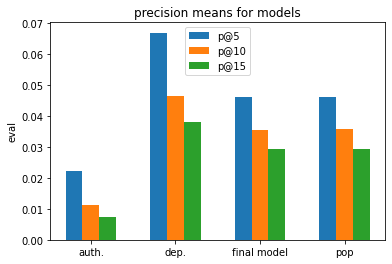

In [34]:
y = [list(r_grpd['precision@5']),list(r_grpd['precision@10']),list(r_grpd['precision@15'])]
bar_names = ['p@5','p@10','p@15']
barplot(y,x_names,bar_names,y_name='eval',width=0.2,title='precision means for models')

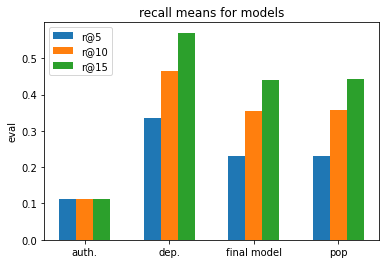

In [38]:
x_names = ['auth.','dep.','final model','pop']
y = [list(r_grpd['recall@5']),list(r_grpd['recall@10']),list(r_grpd['recall@15'])]
bar_names = ['r@5','r@10','r@15']
barplot(y,x_names,bar_names,y_name='eval',width=0.2,title='recall means for models',legend='upper left')

1.0
1.0
1.0


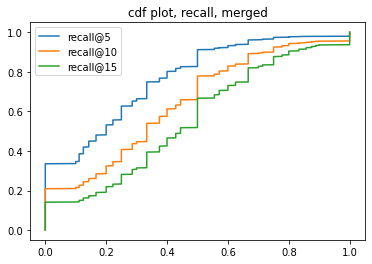

In [47]:
def cdf_plots(names,model_name):
    for name in names:
        p = results[results['model']==model_name].loc[:,name].values[1:]
        p.sort()
        print(p[-1])
        y = np.linspace(1,len(p),len(p))/len(p)
        plt.plot(p,y,label=name)
    plt.legend()
    plt.title(f'cdf plot, {names[0][:-2]}, {model_name}')
    plt.show()
names = ['recall@5', 'recall@10', 'recall@15']
cdf_plots(names,'merged')

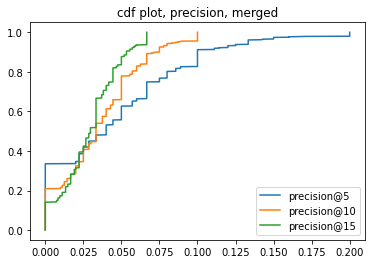

In [45]:
names = ['precision@5', 'precision@10', 'precision@15']
cdf_plots(names,'merged')